In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [104]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [105]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [106]:
df_train['source']='train'
df_test['source']='test'
df = pd.concat([df_train,df_test],axis = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [107]:
df.shape

(783667, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  source                      783667 non-null  object 
dtypes: float64(3),

Some of the Columns have wrong datatypes so we need to change them 
1. Gender
2. Age
3. Stay_In_Current_City_Years
4. City_Category

In [109]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [110]:
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [111]:
df['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [112]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

Now we know how they are distributed across each category lets convert them to Numeric Dtype
#### Gender

In [113]:
Gen={'F':1,'M':2}
df=df.replace({'Gender':Gen})
df['Gender'].head()

0    1
1    1
2    1
3    1
4    2
Name: Gender, dtype: int64

#### Age

In [114]:
df1=df['Age'].unique()
df1=df1.tolist()

li_2=list(range(1,8))
Age_dic =dict(zip(df1,li_2))

df=df.replace({'Age':Age_dic})
df['Age'].head()

0    1
1    1
2    1
3    1
4    2
Name: Age, dtype: int64

#### City Category

In [115]:
City ={'A':1,'B':2,'C':3}
df=df.replace({'City_Category':City})
df['City_Category'].head()

0    1
1    1
2    1
3    1
4    3
Name: City_Category, dtype: int64

#### Stay_In_Current_City_Years

In [116]:
df2=df['Stay_In_Current_City_Years'].unique()
df2=df2.tolist()

li_1=list(range(1,6))
dic=dict(zip(df2,li_1))
df=df.replace({'Stay_In_Current_City_Years':dic})

In [117]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

### NULL VALUE ANALYSIS

In [118]:
col_list = df.columns
col_list = col_list.drop('Purchase')
col_list

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'source'],
      dtype='object')

In [119]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

### Since I have merged train and test dataframes thus Purchase column will have no values for rows of Test dataframe thus no need to take into account null values of Purchase

In [120]:
def analyze_col(df, col_name,head=10):
    null_values = np.sum(df[col_name].isnull(),axis=0)
    print(df[col_name].head(head));print();
    for i,value in enumerate(null_values,1):
        print("Null values of column {} is {}, that is {:.2f}%".format(i,value, value / len(df) * 100));print();

In [121]:
analyze_col(df,col_list)

   User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001  P00069042       1    1          10              1   
1  1000001  P00248942       1    1          10              1   
2  1000001  P00087842       1    1          10              1   
3  1000001  P00085442       1    1          10              1   
4  1000002  P00285442       2    2          16              3   
5  1000003  P00193542       2    3          15              1   
6  1000004  P00184942       2    4           7              2   
7  1000004  P00346142       2    4           7              2   
8  1000004   P0097242       2    4           7              2   
9  1000005  P00274942       2    3          20              1   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           1               0                   3   
1                           1               0                   1   
2                           1               0                  12   
3       

In [122]:
df['Product_Category_2'].fillna(value=df['Product_Category_2'].mean(),inplace=True);
df['Product_Category_3'].fillna(value=df['Product_Category_3'].mean(),inplace=True);

In [123]:
df.drop('Purchase',axis=1).isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
source                        0
dtype: int64

In [124]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

### Outlier Analysis

In [125]:
dfnum = df.drop(['source','Gender','User_ID','Product_ID'],axis=1)

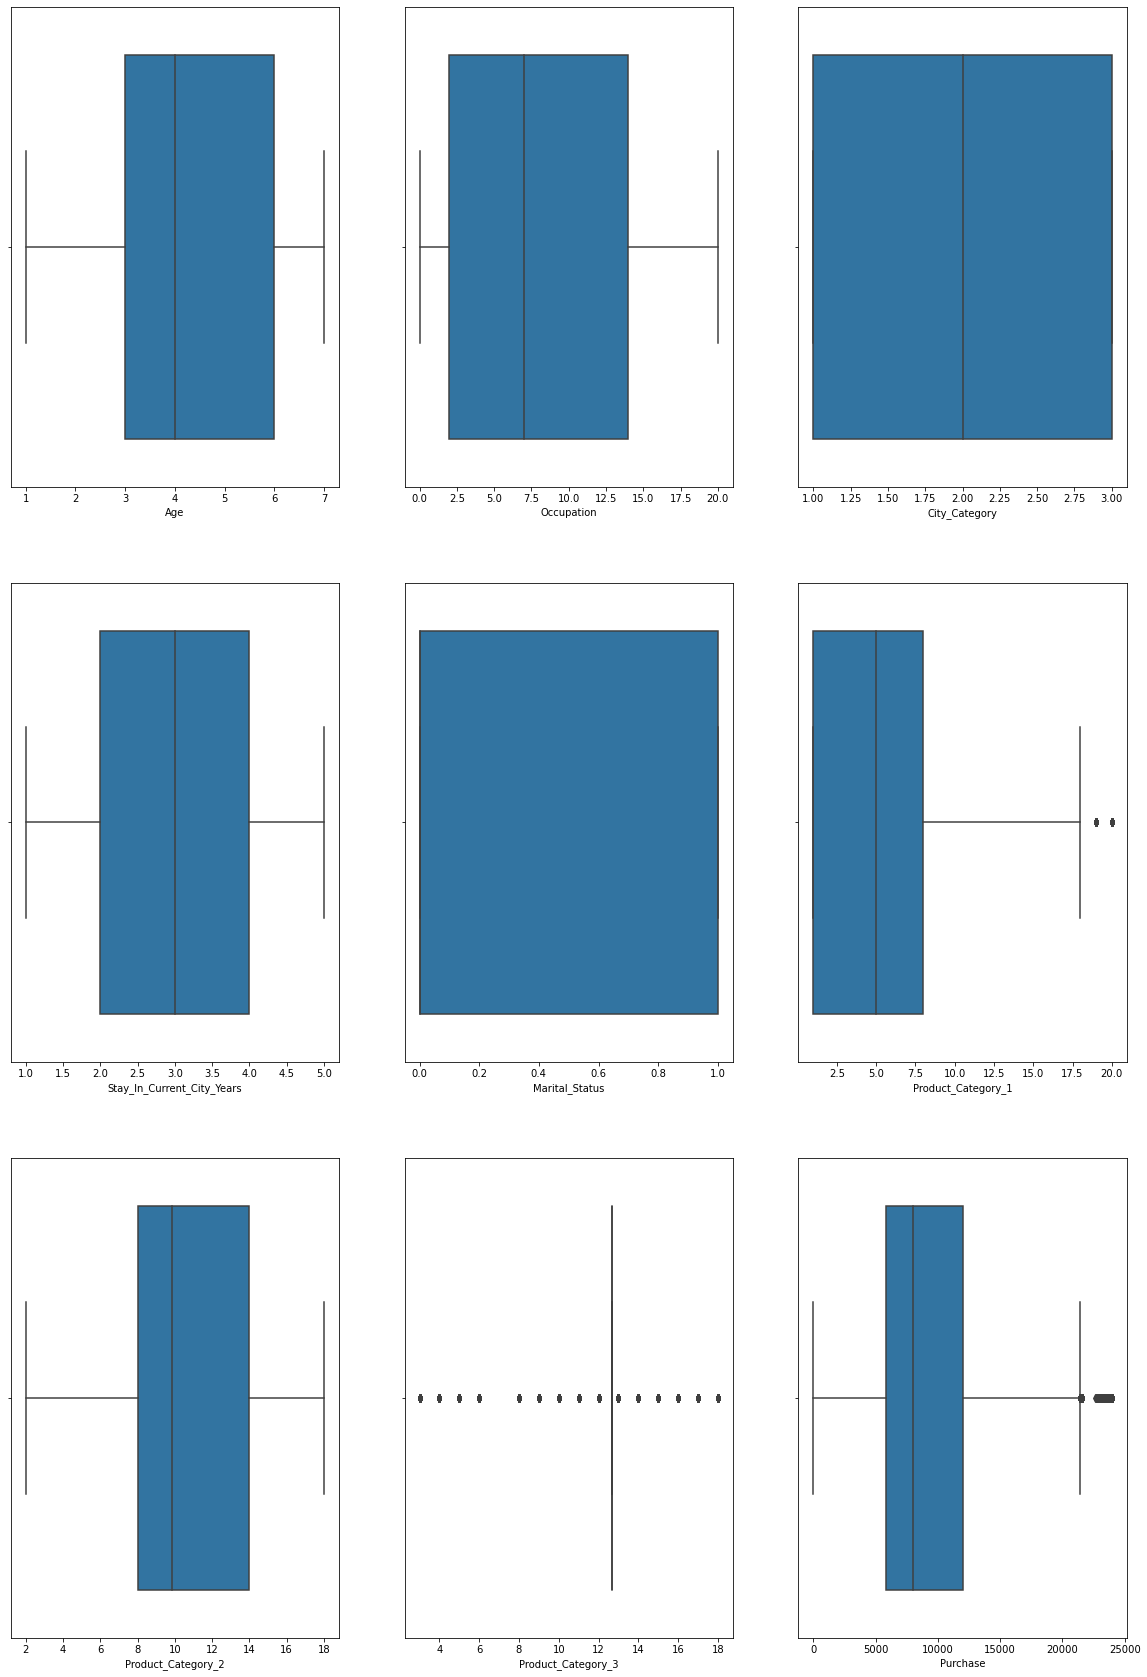

In [126]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20,30))
for var, ax1 in zip(dfnum.columns[:], ax.flatten()) :
    sns.boxplot(dfnum[var], ax=ax1)

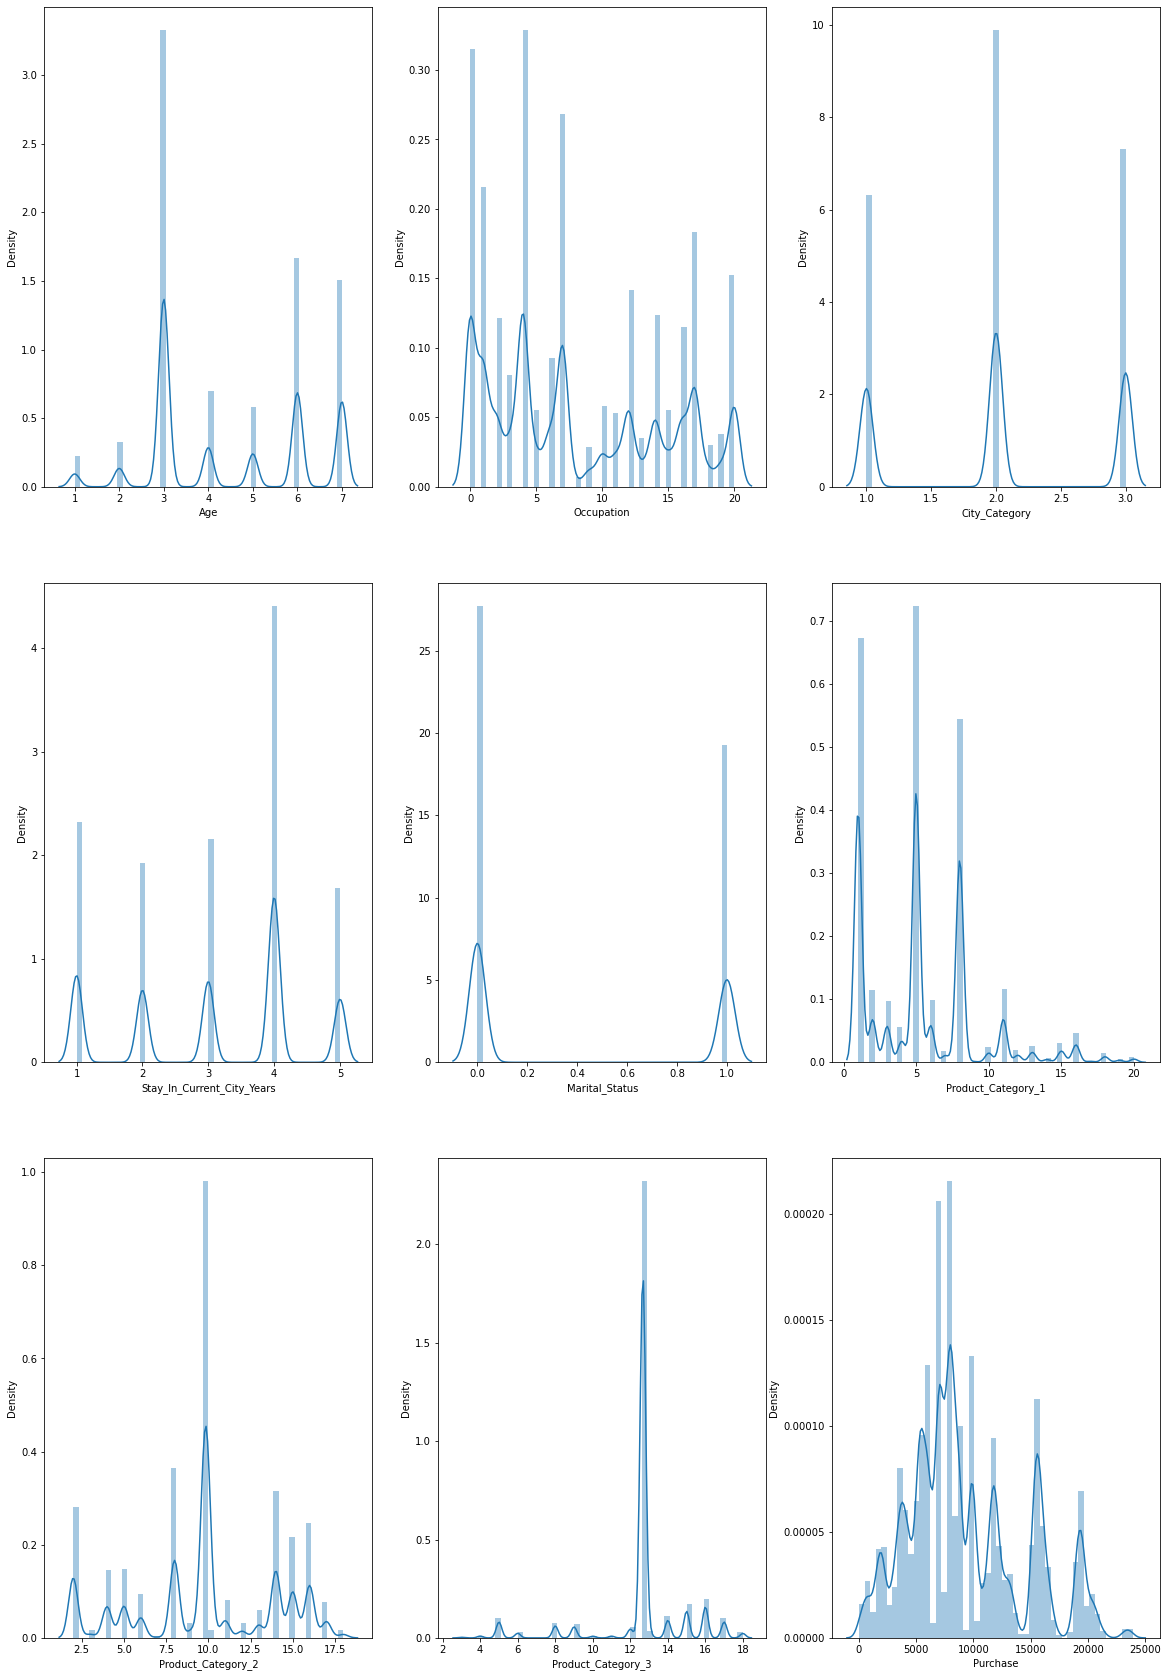

In [127]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20,30))
for var, ax1 in zip(dfnum.columns[:], ax.flatten()) :
    sns.distplot(dfnum[var], ax=ax1)

In [91]:
df.skew()

User_ID                       0.003011
Gender                       -1.172731
Age                           0.147745
Occupation                    0.399767
City_Category                -0.071390
Stay_In_Current_City_Years   -0.306542
Marital_Status                0.366914
Product_Category_1            0.986594
Product_Category_2           -0.197919
Product_Category_3           -1.390412
Purchase                      0.600140
dtype: float64

In [92]:
df.kurt()

User_ID                      -1.194741
Gender                       -0.624703
Age                          -1.345943
Occupation                   -1.216918
City_Category                -1.265577
Stay_In_Current_City_Years   -1.162445
Marital_Status               -1.865379
Product_Category_1            1.117058
Product_Category_2           -0.714828
Product_Category_3            4.227355
Purchase                     -0.338378
dtype: float64

### Multi-Colinearity

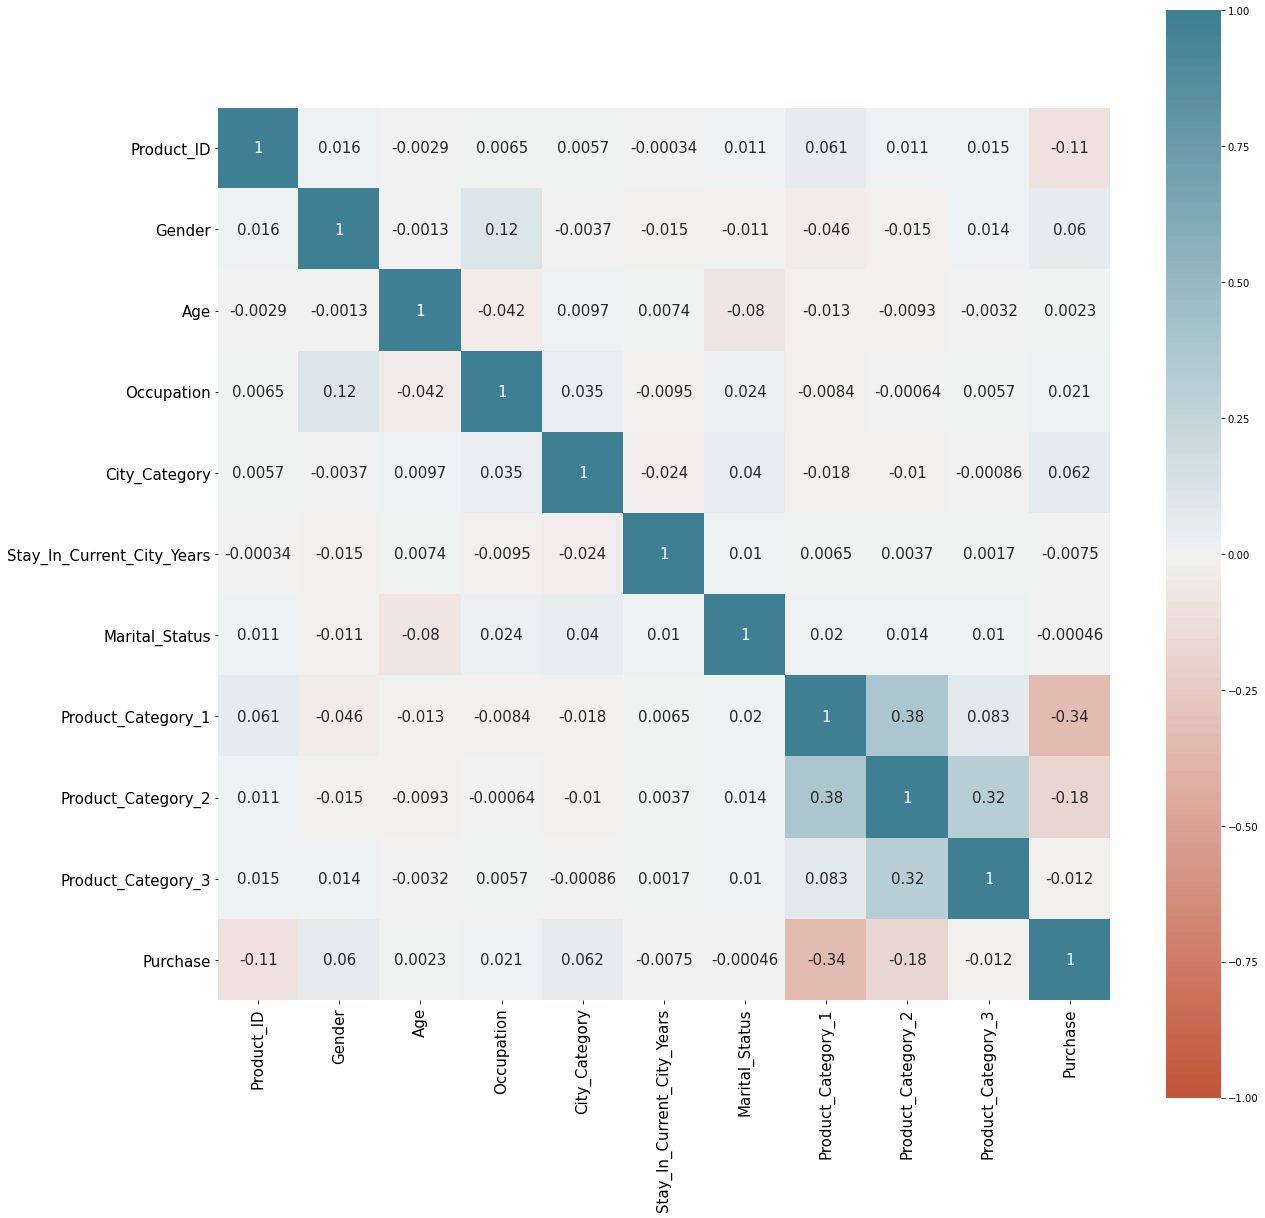

In [60]:
# set dimensions for the plot figure
fig_dims = (20,20)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(df.corr(), annot = True, annot_kws = {"size":15},vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True)

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

There is no Multicolinearity present in the dataset

In [22]:
#Setting_UserID_as_index
df.set_index("User_ID",inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
User_ID,,,,,,,,,,,,
1000001,P00069042,1,1,10,1,1,0,3,9.844506,12.668605,8370.0,train
1000001,P00248942,1,1,10,1,1,0,1,6.000000,14.000000,15200.0,train
1000001,P00087842,1,1,10,1,1,0,12,9.844506,12.668605,1422.0,train
1000001,P00085442,1,1,10,1,1,0,12,14.000000,12.668605,1057.0,train
1000002,P00285442,2,2,16,3,2,0,8,9.844506,12.668605,7969.0,train


In [23]:
le=LabelEncoder()
df['Product_ID']=le.fit_transform(df['Product_ID'])

### Now Divide the data into Train and Test as Before

In [24]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['source','Purchase'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_clean.csv",index=False)
test.to_csv("test_clean.csv",index=False)

In [25]:
train= pd.read_csv('train_clean.csv')
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,684,1,1,10,1,1,0,3,9.844506,12.668605,8370.0
1,2406,1,1,10,1,1,0,1,6.000000,14.000000,15200.0
2,868,1,1,10,1,1,0,12,9.844506,12.668605,1422.0
3,844,1,1,10,1,1,0,12,14.000000,12.668605,1057.0
4,2769,2,2,16,3,2,0,8,9.844506,12.668605,7969.0


In [26]:
test = pd.read_csv('test_clean.csv')
test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1216,2,4,7,2,1,1,1,11.0,12.668605
1,1063,2,3,17,3,5,0,3,5.0,12.668605
2,2799,1,6,1,2,2,1,5,14.0,12.668605
3,1379,1,6,1,2,2,1,4,9.0,12.668605
4,535,1,3,1,3,4,0,4,5.0,12.000000


In [27]:
# Splitting_the_Training_Dataset

y=train['Purchase']
x=train.drop('Purchase',axis=1)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

###  Base Model

### 1. Linear Regression

In [28]:
%time
lr = LinearRegression(normalize=True,n_jobs=-1)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


In [29]:
model = lr.fit(X_train, y_train)

In [30]:
y_pred = model.predict(X_test)

In [31]:
lr.score(X_test,y_test)

0.1340524192809175

In [32]:
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE for Linear Regression :",RMSE_LR)

RMSE for Linear Regression : 4676.677660622933


### 2. Random Forest

In [33]:
%time

rf_regressor = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

model_1 = rf_regressor.fit(X_train, y_train)

CPU times: user 2 µs, sys: 6 µs, total: 8 µs
Wall time: 3.81 µs


In [34]:
rf_pred = model_1.predict(X_test)

In [35]:
rf_regressor.score(X_test,y_test)

0.6744207737624694

In [36]:
RMSE_RF = np.sqrt(mean_squared_error(y_test,rf_pred))
print("RMSE for Random Forest :",RMSE_RF)

RMSE for Random Forest : 2867.6092921040145


In [37]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': (model_1.feature_importances_)*100})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
7,Product_Category_1,64.999156
0,Product_ID,8.753685
3,Occupation,8.080066
5,Stay_In_Current_City_Years,5.034770
2,Age,4.486422
4,City_Category,2.387287
6,Marital_Status,1.957001
8,Product_Category_2,1.547499
1,Gender,1.502715
9,Product_Category_3,1.251398


## HYPER PARAMETER TUNING

In [38]:
tuned_param =  {"n_estimators": [10,50,100],
       "max_depth": [None,10,20,30,40,50,],
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": [2,10,15],
       "min_samples_split": [2,5,20]}

In [39]:
rf_grid = GridSearchCV(estimator = rf_regressor, 
                         param_grid = tuned_param, 
                         cv = 5)

In [40]:
#%time

#rf_grid.fit(X_train, y_train)

In [41]:
#rf_grid.best_params_

In [ ]:
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);